In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import sklearn as sk 

In [10]:
import scipy as sp
import statsmodels.api as sm

## 잔차 정규성

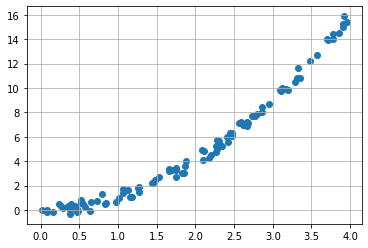

In [12]:
def make_regression2(n_sample=100, bias =0, noise=0.3, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 4
    epsilon = noise * np.random.randn(n_sample)
    y = x **2 + bias + epsilon
    return x, y

x2, y2 = make_regression2()
plt.scatter(x2, y2)
plt.grid('True')
plt.show()

In [14]:
dfX20 = pd.DataFrame(x2, columns=['X1'])
dfX2 = sm.add_constant(dfX20)
dfy2 = pd.DataFrame(y2, columns=['y'])

model2 = sm.OLS(dfy2, dfX2)
result2 = model2.fit()

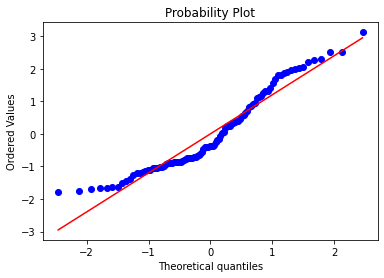

In [15]:
sp.stats.probplot(result2.resid, plot=plt)
plt.show()

In [17]:
test = sm.stats.omni_normtest(result2.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print('%-12s: %6.3f' % xi)

Chi^2       :  9.520
P-value     :  0.009


## 잔차와 독립 변수의 관계

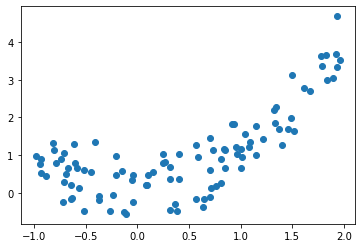

In [19]:
def make_regression3(n_sample=100, bais=0, noise=0.5, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample)*3 - 1
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bais + epsilon
    return x, y


x3, y3 = make_regression3()
plt.scatter(x3, y3)
plt.show()

In [22]:
dfX30 = pd.DataFrame(x3, columns=['X1'])
dfX3 = sm.add_constant(dfX30)
dfy3 = pd.DataFrame(y3, columns=['y'])

model3 = sm.OLS(dfy3, dfX3)
result3 = model3.fit()

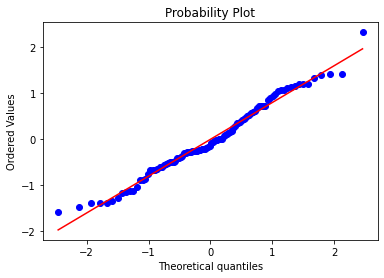

In [23]:
sp.stats.probplot(result3.resid, plot=plt)
plt.show()

In [26]:
test = sm.stats.omni_normtest(result3.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  1.202
P-value     :  0.548


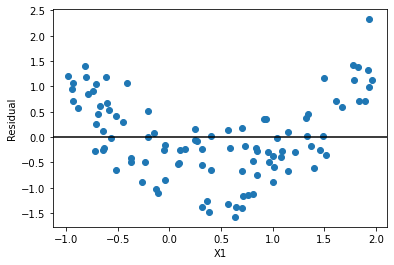

In [27]:
plt.plot(x3, result3.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel('X1')
plt.ylabel('Residual')
plt.show()

## 이분산성

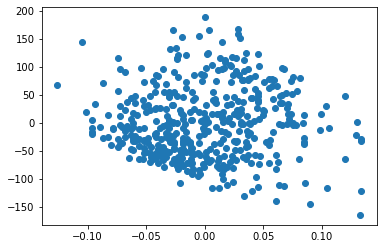

In [36]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.concat([pd.DataFrame(diabetes.data, columns=["x%d" % (i + 1) for i in range(diabetes.data.shape[1])]),
                pd.DataFrame(diabetes.target, columns=["target"])],
               axis=1)
model = sm.OLS.from_formula('target ~ x9', data=df)
result = model.fit()
plt.scatter(df['x9'], result.resid)
plt.show()